<h1 style="text-align:center"> Capstone-Battle of Neighborhoods (week1) </h1>
<p>The project facilitates the user to search for various venues (restaurants, cafes, entertainment etc) On the basis of which neighborhood the user decides to visit, the user can view a list of all the venues according to their search query. The user can view a systematic layout of ratings, location, cuisine etc for all the venues in the neighborhood. Once the user decides the venue they wish to visit, they can see the images of the venue, popular hours etc.</p>
<p> This project uses the Foursquare API to get required information. The results are obtained in json format which needs to be normalised in a dataframe </p>
<p> This notebook will walk you through the above mentioned process, using the location: Delhi, India. The delhi daatset was taken from Kaggle, kindly use the link below to access the dataset. </p>
<a href="https://www.kaggle.com/shaswatd673/delhi-neighborhood-data"> Delhi Neighborhood Dataset </a>


<h4> Target Audience </h4>
<ul>1. Users/Customers </ul>
<ul> 2. Businessmen who wish to open a new restaurant in a particular neighborhood </ul>

For this project we will be needing the following python packages

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

Importing dataset

In [2]:
neighborhoods=pd.read_csv('delhi_dataSet.csv')

In [3]:
neighborhoods.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#neighborhood
neighborhoods.dropna(subset = ["latitude"], inplace=True)
neighborhoods

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
5,North West Delhi,Dhaka,39.031714,-90.261223
6,North West Delhi,Jahangirpuri,28.725972,77.162658
7,North West Delhi,Karala,28.735140,77.032511
8,North West Delhi,Keshav Puram,28.688926,77.161683
9,North West Delhi,Kingsway Camp,28.614262,77.201555
10,North West Delhi,Kohat Enclave,28.698041,77.140539


Using Geolocator, we found out the latitude and longitude of Delhi, India

In [5]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


Using Folium library to visualise the neighborhoods in Delhi

In [6]:
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

Now, lets say that a businessman is looking to open a restaurant in South Delhi. How would he know which neighborhood is most suitable for a restaurant?

In [7]:
southd_data = neighborhoods[neighborhoods['Borough'] == 'South Delhi'].reset_index(drop=True)
southd_data.head()

,Borough,Neighborhood,latitude,longitude
0,South Delhi,Alaknanda,28.529336,77.251632
1,South Delhi,Chhattarpur,28.507007,77.175417
2,South Delhi,Chittaranjan Park,28.538752,77.249249
3,South Delhi,Dayanand Colony,28.562200,77.247613
4,South Delhi,Defence Colony,28.571791,77.232010


Location of South Delhi

In [8]:
address = 'South Delhi, Delhi'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of South Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of South Delhi are 28.485169399999997, 77.19637972381611.


Using Folium to visualise all the neighborhoods of South Delhi

In [9]:
map_south = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(southd_data['latitude'], southd_data['longitude'], southd_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_south)  
    
map_south

Making a connection to Foursquare

In [10]:
CLIENT_ID = 'TWI5ORVRKZDTVHS41VIEDUJGWVH1N1OGNRXFYCMN2AGKTSYP' # your Foursquare ID
CLIENT_SECRET = 'DJ1ABYD3ZC1P51QCJ0XXP4ATKVCS2CZ3DT5VZMSVLTWVBZZI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TWI5ORVRKZDTVHS41VIEDUJGWVH1N1OGNRXFYCMN2AGKTSYP
CLIENT_SECRET:DJ1ABYD3ZC1P51QCJ0XXP4ATKVCS2CZ3DT5VZMSVLTWVBZZI


In [11]:
neighborhood_latitude = southd_data.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = southd_data.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = southd_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alaknanda are 28.529336400000002, 77.2516323.


In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
search_query='Restaurant'

radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT,
    search_query)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=TWI5ORVRKZDTVHS41VIEDUJGWVH1N1OGNRXFYCMN2AGKTSYP&client_secret=DJ1ABYD3ZC1P51QCJ0XXP4ATKVCS2CZ3DT5VZMSVLTWVBZZI&v=20180605&ll=28.529336400000002,77.2516323&radius=500&limit=100&query=Restaurant'

In [13]:
results = requests.get(url).json()
results['response']

{'headerLocation': 'Greater Kailash II',
 'headerFullLocation': 'Greater Kailash II, Delhi',
 'headerLocationGranularity': 'neighborhood',
 'query': 'restaurant',
 'totalResults': 9,
 'suggestedBounds': {'ne': {'lat': 28.533836404500008,
   'lng': 77.25674468575649},
  'sw': {'lat': 28.524836395499996, 'lng': 77.2465199142435}},
 'groups': [{'type': 'Recommended Places',
   'name': 'recommended',
   'items': [{'reasons': {'count': 0,
      'items': [{'summary': 'This spot is popular',
        'type': 'general',
        'reasonName': 'globalInteractionReason'}]},
     'venue': {'id': '4e8c290cf5b91e2255640a4e',
      'name': 'City Of Joy',
      'location': {'address': 'Aravali Shopping Complex, Alaknanda',
       'lat': 28.532684759927243,
       'lng': 77.25300336019707,
       'labeledLatLngs': [{'label': 'display',
         'lat': 28.532684759927243,
         'lng': 77.25300336019707}],
       'distance': 396,
       'cc': 'IN',
       'country': 'India',
       'formattedAddress': 

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we have a geenrated list of all the restaurants in all the neighborhood of South Delhi

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,lat,lng
0,4e8c290cf5b91e2255640a4e,City Of Joy,Restaurant,28.532685,77.253003
1,512f5dd0e4b0f660faefbc6f,Qureshi's,BBQ Joint,28.527830,77.246837
2,4bd578065631c9b6c311a430,Qureshi Kabab,BBQ Joint,28.527750,77.246966
3,4c41e3c0d691c9b63f6b8d0a,Subway,New American Restaurant,28.526833,77.252821
4,4ea2a19d02d529c116b0d6bd,Nathu's Sweets,Indian Restaurant,28.533233,77.250138


In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            search_query)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['location']['distance']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
southd_venues = getNearbyVenues(names=southd_data['Neighborhood'],
                                   latitudes=southd_data['latitude'],
                                   longitudes=southd_data['longitude']
                                  )

Alaknanda
Chhattarpur
Chittaranjan Park
Dayanand Colony
Defence Colony
East of Kailash
Friends Colony
Govindpuri
Greater Kailash
Green Park
Gulmohar Park
Hauz Khas
Hauz Khas Village
Jaitpur
Jangpura
Jasola
Jor Bagh
Kailash Colony
Kalkaji
Khanpur
Khirki Village
Lajpat Nagar
Lodi Colony
Maharani Bagh
Malviya Nagar
Mehrauli
Neeti Bagh
Nehru Place
Netaji Nagar
New Friends Colony
Nizamuddin West
Okhla
Safdarjung Enclave
Sainik Farm
Saket
Sangam Vihar
Sarita Vihar
Sarojini Nagar
Sarvodaya Enclave
Shahpur Jat
Siri Fort
South Extension
Sriniwaspuri
Tughlaqabad
Badarpur


In [19]:
print(southd_venues.shape)
southd_venues.head()

(346, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alaknanda,28.529336,77.251632,4e8c290cf5b91e2255640a4e,City Of Joy,28.532685,77.253003,396
1,Alaknanda,28.529336,77.251632,512f5dd0e4b0f660faefbc6f,Qureshi's,28.527830,77.246837,498
2,Alaknanda,28.529336,77.251632,4bd578065631c9b6c311a430,Qureshi Kabab,28.527750,77.246966,489
3,Alaknanda,28.529336,77.251632,4c41e3c0d691c9b63f6b8d0a,Subway,28.526833,77.252821,301
4,Alaknanda,28.529336,77.251632,4ea2a19d02d529c116b0d6bd,Nathu's Sweets,28.533233,77.250138,457


Here we see the number of restaurants in each neighborhood

In [153]:
southd_venues.groupby('Neighborhood').count()
#southd_venues


,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Alaknanda,9,9,9,9,9,9,9
Chhattarpur,4,4,4,4,4,4,4
Chittaranjan Park,6,6,6,6,6,6,6
Dayanand Colony,4,4,4,4,4,4,4
Defence Colony,16,16,16,16,16,16,16
East of Kailash,7,7,7,7,7,7,7
Friends Colony,3,3,3,3,3,3,3
Greater Kailash,11,11,11,11,11,11,11
Green Park,24,24,24,24,24,24,24


Hence, if a person is looking to open a restaurant in South Delhi, the data above can help them take an informed decision.
Areas most populated with restaurants are 
<ul>Defence Colony</ul>
<ul>Greater Kailash</ul>
<ul>Green Park</ul>
<ul> Hauz Khas Village </ul>
<ul> Khirki Village </ul>
<ul> Lajpat Nagar </ul>
<ul> Malviya Nagar </ul>
<ul> Nehru PLace </ul>
<ul> South Extension </ul>


To view all the restaurants in all the neighborhood of South Delhi, the user can refer to the dataframe below

In [154]:
southd_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alaknanda,28.529336,77.251632,4e8c290cf5b91e2255640a4e,City Of Joy,28.532685,77.253003,396
1,Alaknanda,28.529336,77.251632,512f5dd0e4b0f660faefbc6f,Qureshi's,28.527830,77.246837,498
2,Alaknanda,28.529336,77.251632,4bd578065631c9b6c311a430,Qureshi Kabab,28.527750,77.246966,489
3,Alaknanda,28.529336,77.251632,4c41e3c0d691c9b63f6b8d0a,Subway,28.526833,77.252821,301
4,Alaknanda,28.529336,77.251632,4ea2a19d02d529c116b0d6bd,Nathu's Sweets,28.533233,77.250138,457
5,Alaknanda,28.529336,77.251632,4b72cee0f964a520a0892de3,"Republic of Chicken, Alaknanda",28.525712,77.254033,466
6,Alaknanda,28.529336,77.251632,4c4ad4c4bad7a59310dff9aa,Pizza Hut - Alaknanda,28.527935,77.247085,471
7,Alaknanda,28.529336,77.251632,51389d9ce4b0aeb545d2f3c5,zaitoon,28.527917,77.246861,492
8,Alaknanda,28.529336,77.251632,4d497029183f224b7744dea8,The Final Frontier,28.527740,77.246872,498
9,Chhattarpur,28.507007,77.175417,4fa786aae4b0d6f4be28144f,Konomi @ Trident Gurgaon,28.507598,77.175401,65


In [22]:
print('There are {} uniques venues.'.format(len(southd_venues['Venue'].unique())))

There are 293 uniques venues.


Now, lets say the user wishes to go out to eat somewhere near Saket and wishes to have a look at all the possible options

In [121]:
saket=southd_venues[southd_venues['Neighborhood']=='Saket'].reset_index()
saket=saket.drop('index', axis=1)
saket

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Saket,28.524411,77.213725,4fb5d360e4b06101e9ee6dba,Dakshin,28.526670,77.216081,341
1,Saket,28.524411,77.213725,55262376498e3c991196b070,Mahabelly,28.527303,77.216800,440
2,Saket,28.524411,77.213725,4b8fda02f964a520896533e3,Hard Rock Cafe New Delhi,28.527218,77.217124,456
3,Saket,28.524411,77.213725,4c6e69fd4d24b60c1b82d8d8,"Baywatch, Sheraton Saket",28.526675,77.215963,333
4,Saket,28.524411,77.213725,51f553b7498e3d7f915d504e,Rajdhani Thali,28.527672,77.217082,489
5,Saket,28.524411,77.213725,518d1338498e9eba21ec9c00,Barbeque Nation Saket,28.527406,77.217185,475
6,Saket,28.524411,77.213725,5325c75d498ee8c0b04f035b,Chili's Grill & Bar,28.528462,77.215913,499
7,Saket,28.524411,77.213725,4d84e916e83fa143ab3c6ea1,Pan Asian,28.526908,77.216084,361
8,Saket,28.524411,77.213725,52adddf911d203bc1b0865e1,Dhaba,28.527659,77.217211,496


In [64]:
result['response']['venue'].keys()

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])

For a more informed decision, the user might wanna see the name, ratings, location etc for every venue in Saket

In [57]:
ratings=[] #ratings for all restaurants in saket, south delhi
for i in saket.index:
    venue_id=saket['Id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        ratings.append(result['response']['venue']['rating'])
        #print(result['response']['venue']['rating'])
    except:
        ratings.append('This venue has not been rated yet.')
        #print('This venue has not been rated yet.')



In [58]:
address=[] #address for all restaurants in saket, south delhi
for i in saket.index:
    venue_id=saket['Id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        address.append(result['response']['venue']['location']['address'])
        
    except:
        address.append('Address not available for this venue.')
        

In [59]:
cuisine=[] #cuisine for all restaurants in saket, south delhi
for i in saket.index:
    venue_id=saket['Id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        cuisine.append(result['response']['venue']['categories'][0]['name'])
        
    except:
        cuisine.append('Cuisine not available for this venue.')
        

In [60]:
price_range=[] #price for all restaurants in saket, south delhi
for i in saket.index:
    venue_id=saket['Id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        price_range.append(result['response']['venue']['price']['message'])
        
    except:
        price_range.append('Price not available for this venue.')

In [94]:
status=[] #status for all restaurants in saket, south delhi
for i in saket.index:
    venue_id=saket['Id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        if result['response']['venue']['defaultHours']['isOpen']==True:
            status.append('Open')
        
    except:
        status.append('Status not available')

The dataframe below gives information about Ratings, Address, Cuisine, Price and Status for each venue in Saket

This is helpful for a business looking to open a restaurant in Saket, because it will help him come up with a newer cuisine in the neighborhood, have a better idea about the right pricing, opening hours etc.

In [96]:
data=pd.DataFrame(columns=['Venue', 'Ratings'])
data['Venue']=saket['Venue']
data['Ratings']=ratings
data['Address']=address
data['Cuisine']=cuisine
data['Price Estimation']=price_range
data['Status']=status
data

,Venue,Ratings,Address,Cuisine,Price Estimation,Status
0,Dakshin,8.1,Itc Sheraton,Indian Restaurant,Moderate,Status not available
1,Mahabelly,8.4,"MA-A05, Restaurant Block, Ground Floor",Restaurant,Moderate,Status not available
2,Hard Rock Cafe New Delhi,8.2,"M 110, Multiplex Building' 1st Floor, Dlf Plac...",American Restaurant,Moderate,Open
3,"Baywatch, Sheraton Saket",7.5,Saket,Café,Cheap,Open
4,Rajdhani Thali,7.8,"DLF Place, Saket",Asian Restaurant,Moderate,Status not available
5,Barbeque Nation Saket,6.4,DLF Place Mall Saket,Indian Restaurant,Moderate,Status not available
6,Chili's Grill & Bar,6.4,DLF Place Saket,Tex-Mex Restaurant,Price not available for this venue.,Status not available
7,Pan Asian,6.1,ITC Sheraton,Chinese Restaurant,Cheap,Status not available
8,Dhaba,This venue has not been rated yet.,DLF Place,Indian Restaurant,Moderate,Status not available


Now, lets suppose the user decides to go to the Hard Rock Cafe in Saket, Delhi but before that he would like to check the venue photos, contact info incase of reservation, popular hours etc

In [122]:
venue_id = '4b8fda02f964a520896533e3' # ID of Hard Rock Cafe
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url
result = requests.get(url).json()

In [123]:
import urllib.request
from PIL import Image #pip install pillow

In [124]:
url="https://fastly.4sqi.net/img/general/300x300/CGUvBV4k5asLOYbHIsEnayYQwafglYMJnSEBSdN0t2k.jpg"

<h4>Images of Hard Rock Cafe</h4>

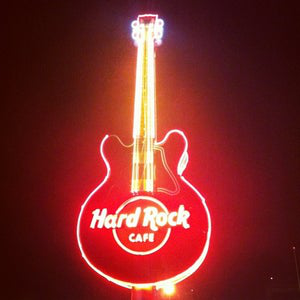

In [125]:
Image.open(urllib.request.urlopen(url))

In [126]:
result['response']['venue'].keys()

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])

<h4> Popular hours at the Hard Rock Cafe </h4>

In [127]:
popular_hours = json_normalize(result['response']['venue']['popular']['timeframes'])
popular_hours.drop('segments', axis=1, inplace=True)
popular_hours


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,days,includesToday,open
0,Today,True,[{'renderedTime': '1:00 PM–Midnight'}]
1,Sun,NaN,[{'renderedTime': '1:00 PM–11:00 PM'}]
2,Mon,NaN,[{'renderedTime': '8:00 PM–10:00 PM'}]
3,Tue,NaN,[{'renderedTime': '6:00 PM–11:00 PM'}]
4,Wed–Thu,NaN,[{'renderedTime': '7:00 PM–Midnight'}]
5,Fri,NaN,[{'renderedTime': '6:00 PM–Midnight'}]


<h4> Contact Info for the Hard Rock cafe </h4>

In [131]:
result['response']['venue']['contact']['phone']

'+911147158888'

<h4> Reasons to visit the Hard Rock cafe </h4>

In [136]:
result['response']['venue']['reasons']['items'][0]['summary']

'Lots of people like this place'

<h4> A summary of how many people liked the Hard Rock Cafe </h4>

In [140]:
result['response']['venue']['likes']['summary']

'285 Likes'

Now, the user wishes to have a look at all the trending venues in his neighborhood

Enter the location and generate coordinates

In [145]:
address = '102 North End Ave, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7151482 -74.0156573


In [146]:
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edb481483525f001bcd83f0'},
 'response': {'venues': []}}

<h4> !--Currently no trending venues due to the Pandemic--! </h4>

In [147]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [148]:
trending_venues_df

'No trending venues are available at the moment!'

In [149]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [150]:
# display map
venues_map

'Cannot generate visual as no trending venues are available at the moment!'

<h1 style="text-align:center"> Thank You </h1>
